In [ ]:
import pandas as pd
import numpy as np
# Create a date range for the past 5 years with hourly frequency
date_rng = pd.date_range(start='2018-09-10', end='2023-09-10', freq='H')
# Create a sample dataframe
df = pd.DataFrame(date_rng, columns=['date'])
df = df.set_index('date')
df['Region_1'] = np.random.randint(0, 1000, size=(len(date_rng)))
df['Region_2'] = np.random.randint(0, 1000, size=(len(date_rng)))
df['Region_3'] = np.random.randint(0, 1000, size=(len(date_rng)))
# Calculate the daily total for each region
daily_totals = df.resample('D').sum()
# Calculate the hourly percentage of the daily total for each region
for region in ['Region_1', 'Region_2', 'Region_3']:
    df[f'{region}_percentage'] = df[region] / df[region].resample('D').transform('sum')
# Display the first few rows of the dataframe
df.head()

In [ ]:
# Multiply the percentage columns by 100 to get the values in percentage format
for region in ['Region_1', 'Region_2', 'Region_3']:
    df[f'{region}_percentage'] = df[f'{region}_percentage'] * 100
# Display the first few rows of the dataframe after the update
df.head()

In [ ]:
# Define the time buckets
time_buckets = {
    'Jan-Feb': [1, 2],
    'Mar-May': [3, 4, 5],
    'Jun-Sep': [6, 7, 8, 9],
    'Oct-Dec': [10, 11, 12]
}
# Calculate the average percentage for each hour in each time bucket for each region
average_percentages = {}
for bucket, months in time_buckets.items():
    subset = df[df.index.month.isin(months)]
    hourly_avg = subset.groupby(subset.index.hour)[['Region_1_percentage', 'Region_2_percentage', 'Region_3_percentage']].mean()
    average_percentages[bucket] = hourly_avg
average_percentages['Jan-Feb'].head()

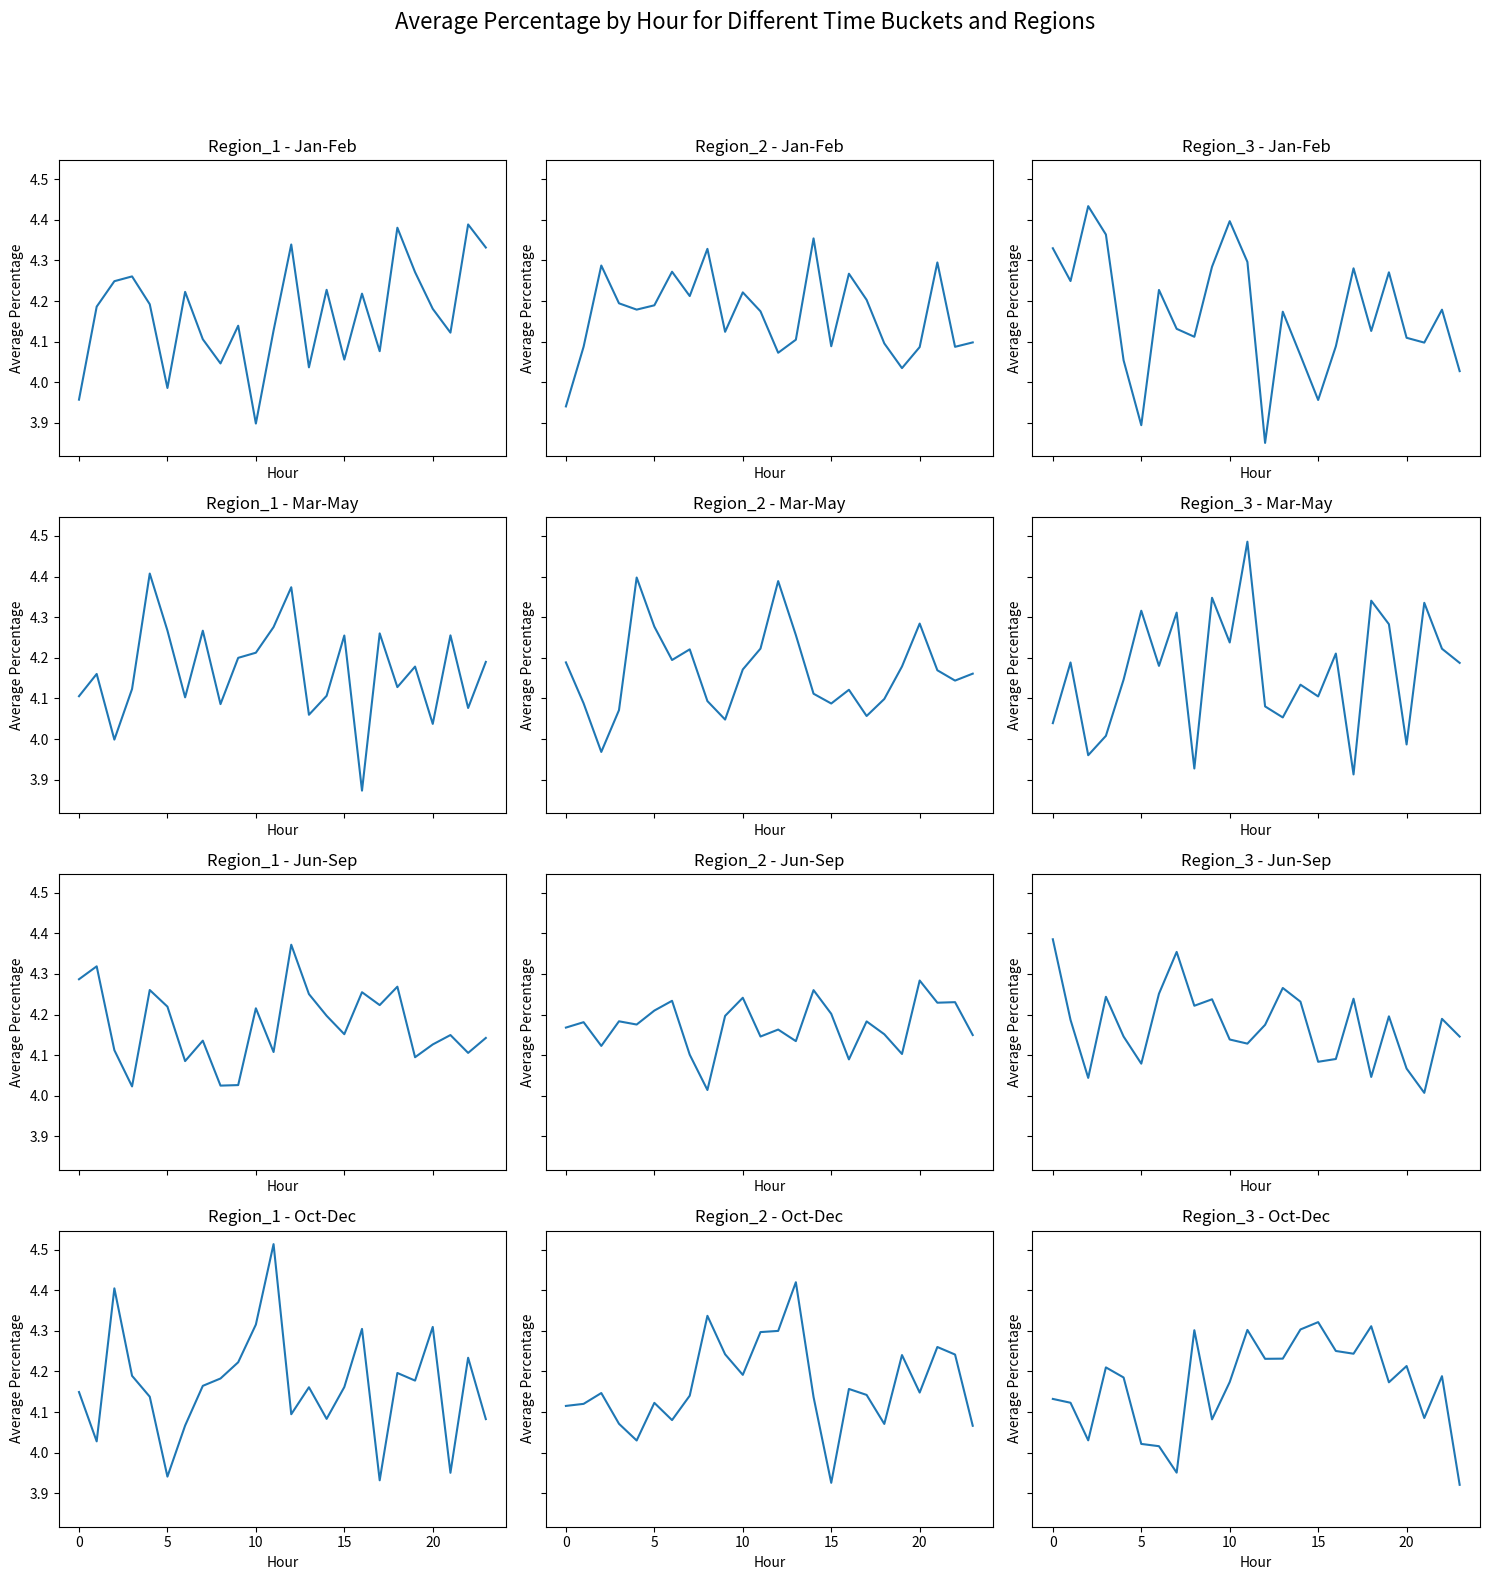

In [ ]:
import matplotlib.pyplot as plt
# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle('Average Percentage by Hour for Different Time Buckets and Regions', fontsize=16, y=1.05)
# Loop through each time bucket and region to plot the graphs
for i, (bucket, months) in enumerate(time_buckets.items()):
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        axs[i, j].plot(average_percentages[bucket].index, average_percentages[bucket][f'{region}_percentage'])
        axs[i, j].set_title(f'{region} - {bucket}')
        axs[i, j].set_xlabel('Hour')
        axs[i, j].set_ylabel('Average Percentage')
# Adjust layout
plt.tight_layout()
plt.show()

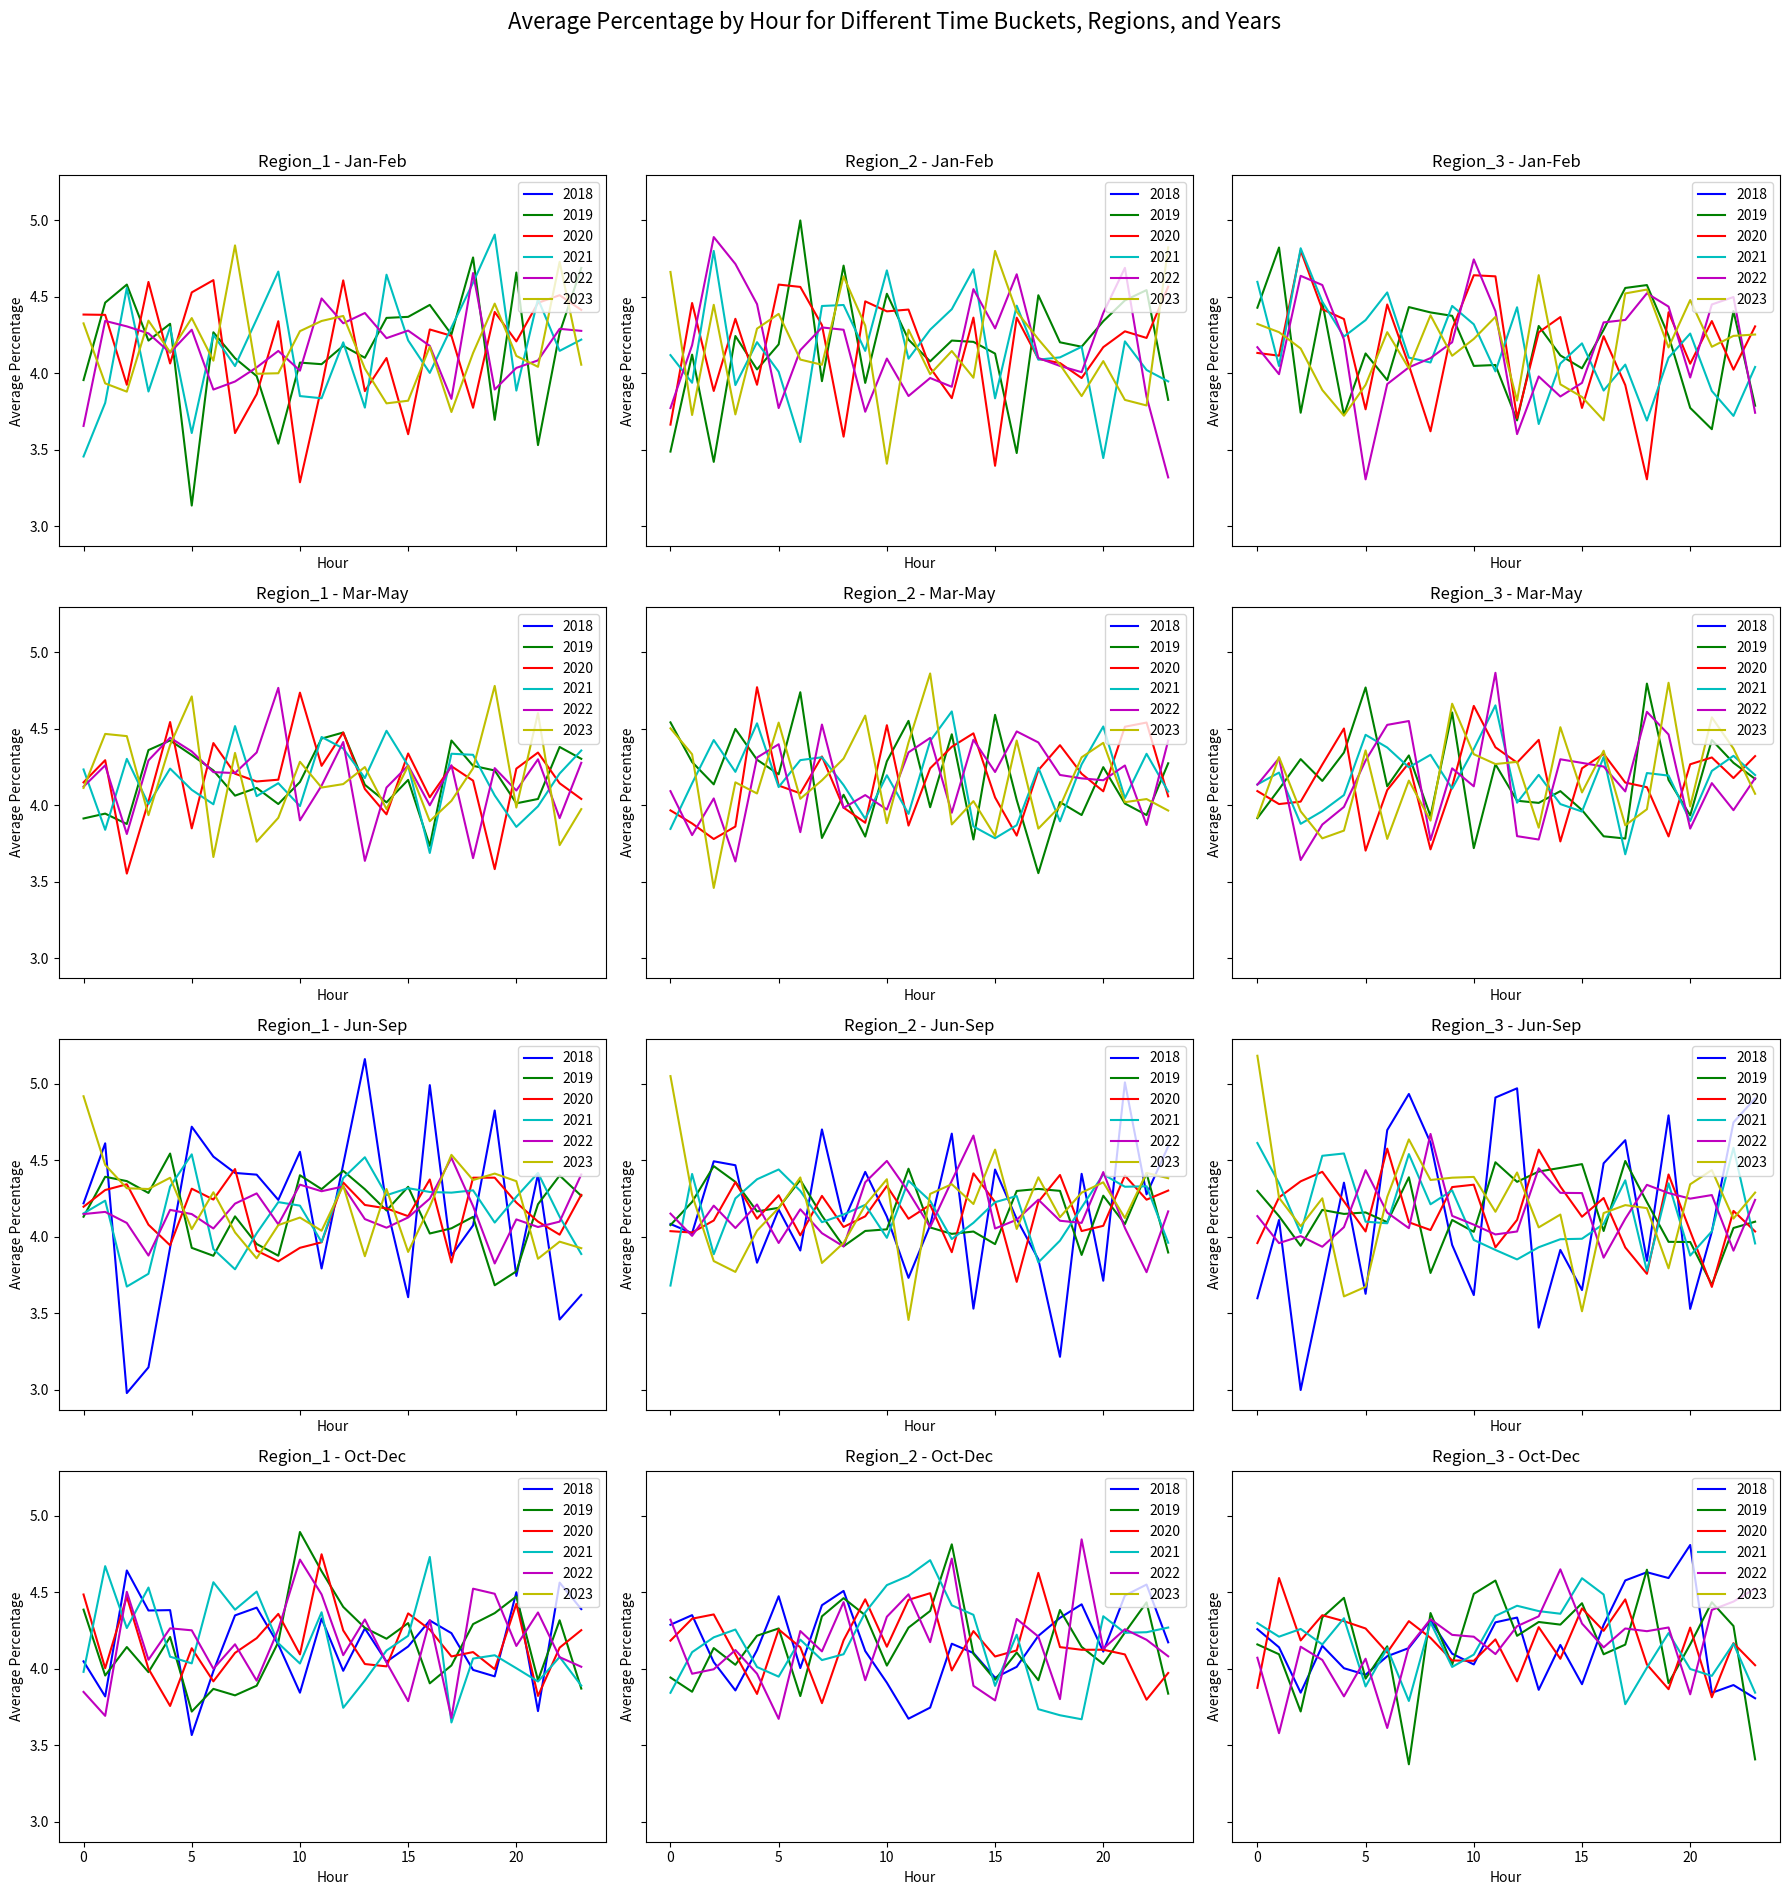

In [ ]:
# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(18, 18), sharex=True, sharey=True)
fig.suptitle('Average Percentage by Hour for Different Time Buckets, Regions, and Years', fontsize=16, y=1.05)
# Define colors for each year
colors = {2018: 'b', 2019: 'g', 2020: 'r', 2021: 'c', 2022: 'm', 2023: 'y'}
# Loop through each time bucket and region to plot the graphs
for i, (bucket, months) in enumerate(time_buckets.items()):
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        for year, color in colors.items():
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            hourly_avg = subset.groupby(subset.index.hour)[f'{region}_percentage'].mean()
            axs[i, j].plot(hourly_avg.index, hourly_avg, color=color, label=year)
        axs[i, j].set_title(f'{region} - {bucket}')
        axs[i, j].set_xlabel('Hour')
        axs[i, j].set_ylabel('Average Percentage')
        axs[i, j].legend(loc='upper right')
# Adjust layout
plt.tight_layout()
plt.show()

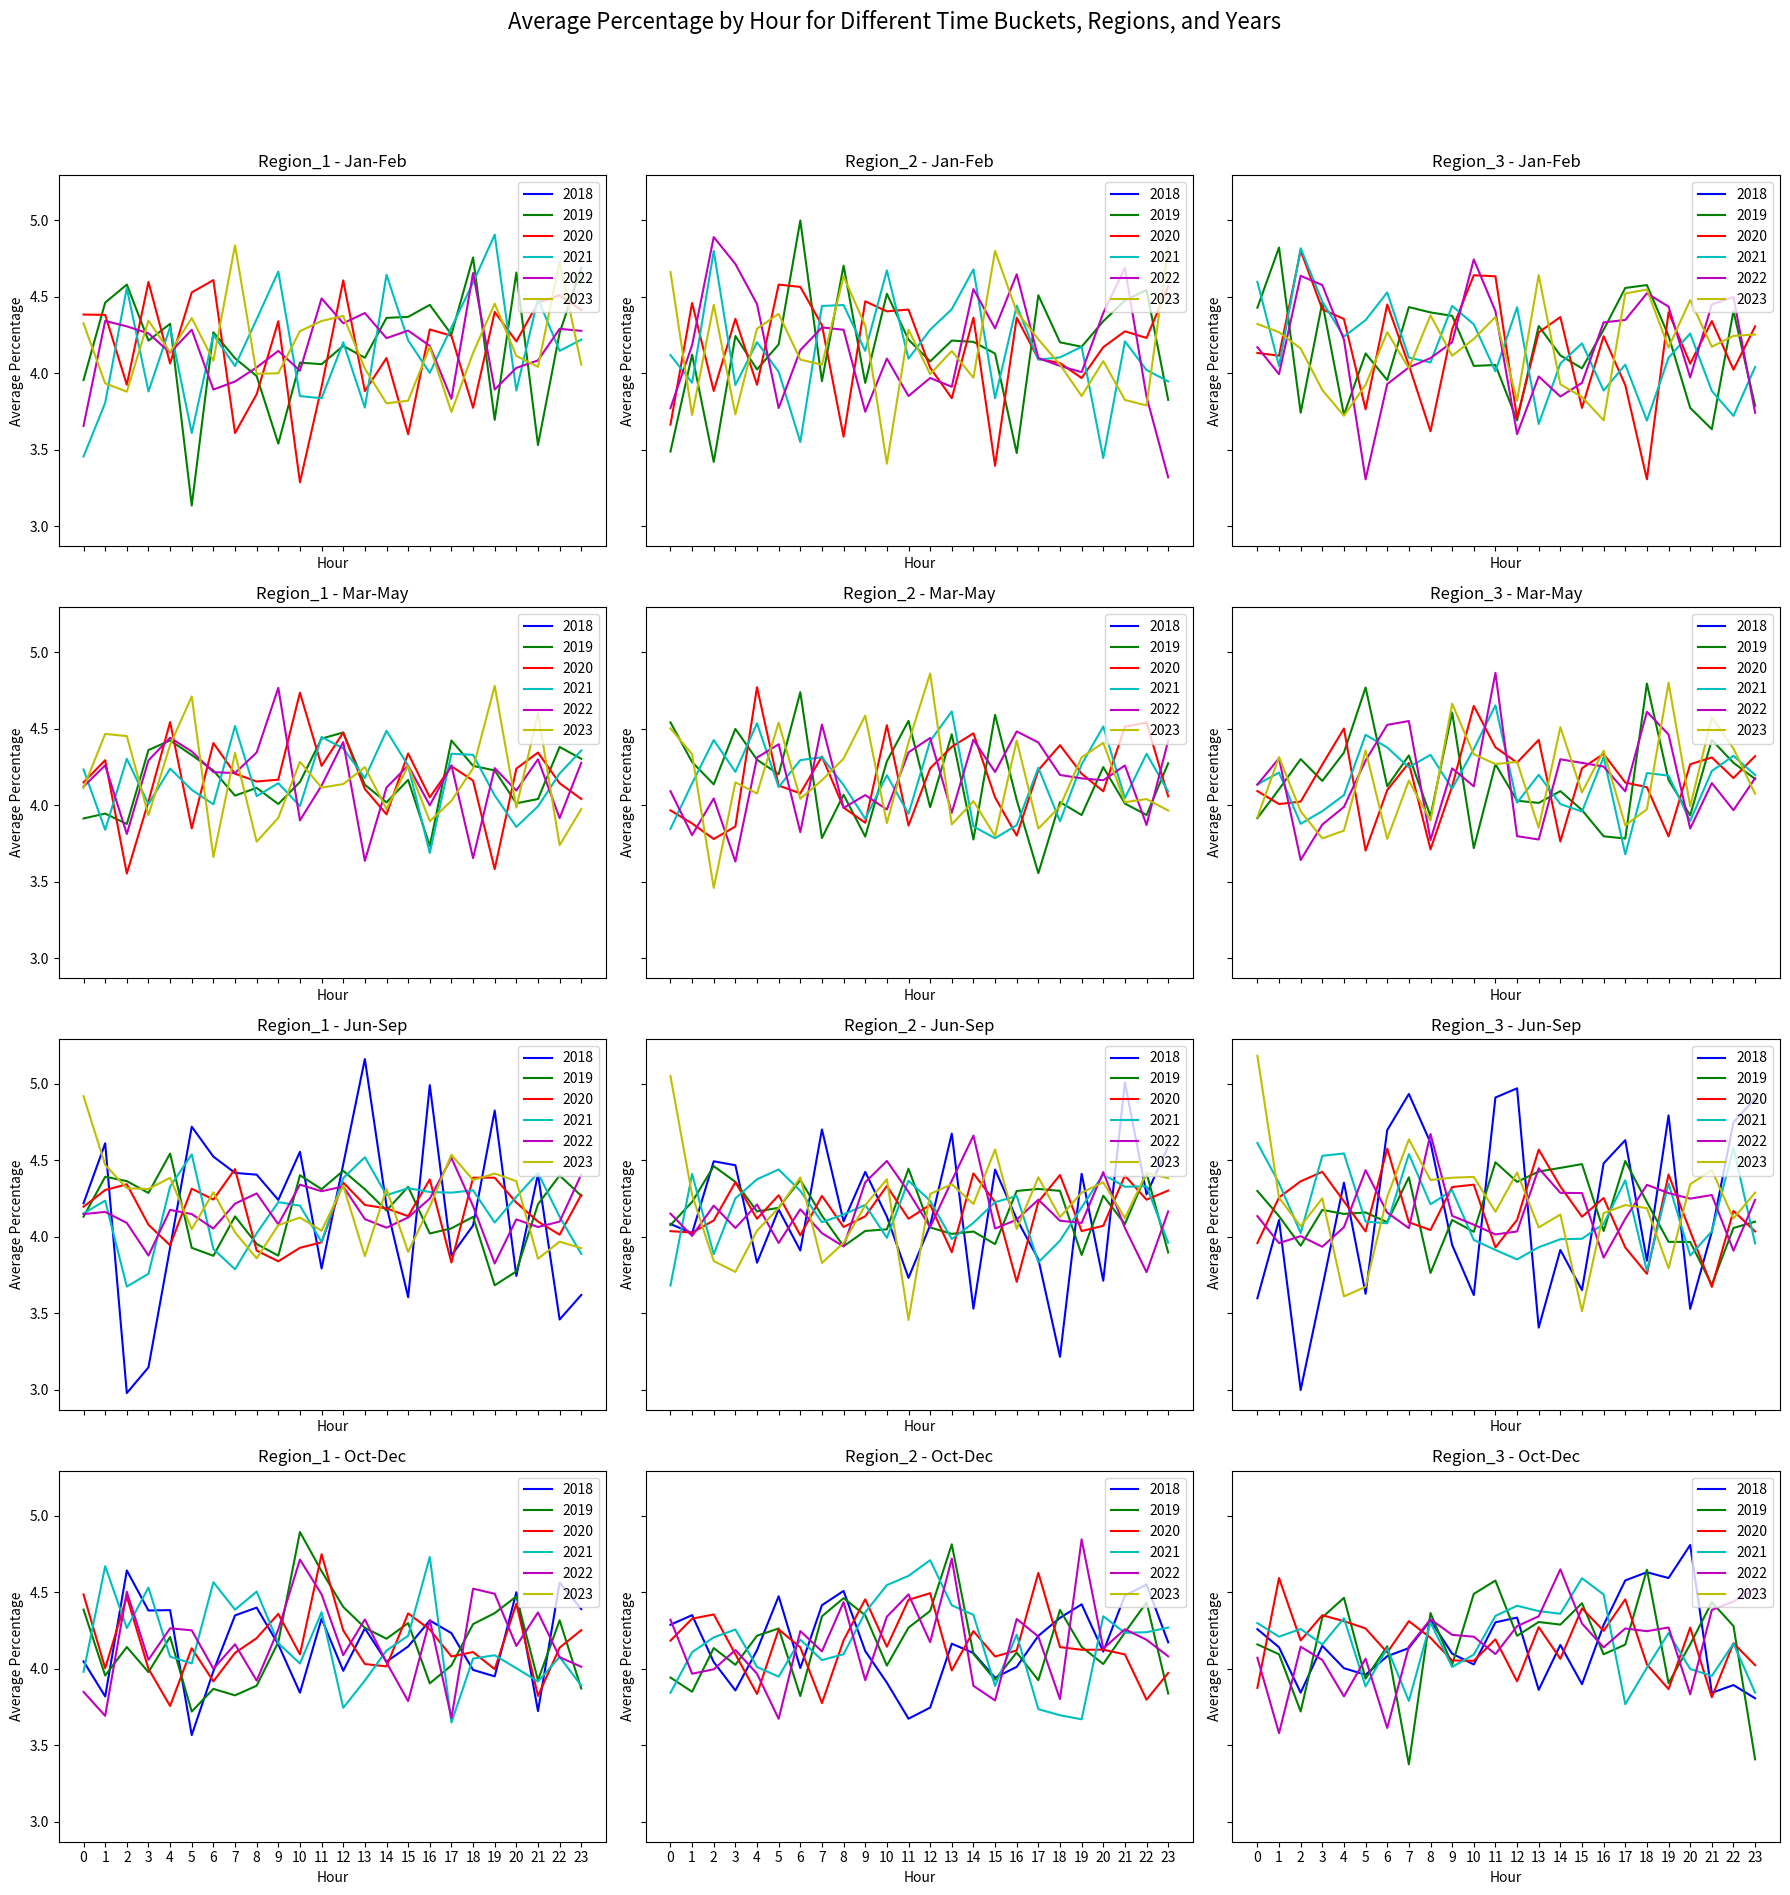

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(18, 18), sharex=True, sharey=True)
fig.suptitle('Average Percentage by Hour for Different Time Buckets, Regions, and Years', fontsize=16, y=1.05)
for i, (bucket, months) in enumerate(time_buckets.items()):
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        for year, color in colors.items():
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            hourly_avg = subset.groupby(subset.index.hour)[f'{region}_percentage'].mean()
            axs[i, j].plot(hourly_avg.index, hourly_avg, color=color, label=year)
        axs[i, j].set_title(f'{region} - {bucket}')
        axs[i, j].set_xlabel('Hour')
        axs[i, j].set_ylabel('Average Percentage')
        axs[i, j].legend(loc='upper right')
        axs[i, j].set_xticks(range(24))
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots
fig = make_subplots(rows=4, cols=3, shared_xaxes=True, shared_yaxes=True, subplot_titles=[f'{region} - {bucket}' for bucket in time_buckets for region in ['Region_1', 'Region_2', 'Region_3']])
# Plot data for each region and time bucket
for i, (bucket, months) in enumerate(time_buckets.items()):
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        for year, color in colors.items():
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            hourly_avg = subset.groupby(subset.index.hour)[f'{region}_percentage'].mean()
            fig.add_trace(go.Scatter(x=hourly_avg.index, y=hourly_avg, mode='lines', name=str(year), line=dict(color=color)), row=i+1, col=j+1)
# Update layout
fig.update_layout(title_text='Average Percentage by Hour for Different Time Buckets, Regions, and Years', showlegend=True)
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of scatter.line
        Received value: 'b'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [ ]:
# Define RGB colors for each year
colors = {2018: 'rgb(0,0,255)', 2019: 'rgb(0,128,0)', 2020: 'rgb(255,0,0)', 2021: 'rgb(0,255,255)', 2022: 'rgb(255,0,255)', 2023: 'rgb(255,255,0)'}
# Create subplots
fig = make_subplots(rows=4, cols=3, shared_xaxes=True, shared_yaxes=True, subplot_titles=[f'{region} - {bucket}' for bucket in time_buckets for region in ['Region_1', 'Region_2', 'Region_3']])
# Plot data for each region and time bucket
for i, (bucket, months) in enumerate(time_buckets.items()):
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        for year, color in colors.items():
            subset = df[(df.index.year == year) & (df.index.month.isin(months))]
            hourly_avg = subset.groupby(subset.index.hour)[f'{region}_percentage'].mean()
            fig.add_trace(go.Scatter(x=hourly_avg.index, y=hourly_avg, mode='lines', name=str(year), line=dict(color=color)), row=i+1, col=j+1)
# Update layout
fig.update_layout(title_text='Average Percentage by Hour for Different Time Buckets, Regions, and Years', showlegend=True)
fig.show()